In [1]:
import datetime
import os
from mdagent import MDAgent

In [2]:
prompt15 = "Simulate trypsin (1TRN) for 1 ns at 300 K and compute SASA."
llm_var = "accounts/fireworks/models/llama-v3p1-405b-instruct"
tools = "all"
agent = MDAgent(agent_type="Structured", model=llm_var, top_k_tools=tools)
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)
print("LLM: ",agent.llm.model_name,"\nTemperature: ",agent.llm.temperature)

date and time: 2024-09-05
time: 10:25:42
LLM:  accounts/fireworks/models/llama-v3p1-405b-instruct 
Temperature:  0.1


In [3]:
agent.run(prompt15)

Thought: First, I need to download the PDB file for trypsin (1TRN) and then set up and run a simulation for 1 ns at 300 K. After the simulation, I will compute the Solvent Accessible Surface Area (SASA) of the protein.

Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": "1TRN"
}
```
PDB file found with this ID: 1TRN
Thought: Now that I have the PDB file, I can set up and run a simulation for 1 ns at 300 K using the SetUpandRunFunction tool.

Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1TRN_102551",
    "forcefield_files": ["amber99sbildn.xml"],
    "save": true,
    "system_params": {
      "nonbondedMethod": "NoCutoff",
      "constraints": "None",
      "rigidWater": false
    },
    "integrator_params": {
      "integrator_type": "LangevinMiddle",
      "Temperature": "300 * kelvin",
      "Friction": "1.0 / picoseconds",
      "Timestep": "0.002 * picoseconds",
      "Pressure": "1.0 * bar"
    },
    "simulation_params": {
    

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [4]:
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)

registry = agent.path_registry
print('ckpt_dir:',os.path.basename(registry.ckpt_dir))
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

date and time: 2024-09-05
time: 12:09:55
ckpt_dir: ckpt_96
Files found in registry: 1TRN_102551: PDB file downloaded from RSCB
 PDBFile ID: 1TRN_102551
 1TRN_102602: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_102606: Initial positions for simulation sim0_102606
 sim0_102606: Basic Simulation of Protein 1TRN_102602
 rec0_102607: Simulation trajectory for protein 1TRN_102602 and simulation sim0_102606
 rec1_102607: Simulation state log for protein 1TRN_102602 and simulation sim0_102606
 rec2_102607: Simulation pdb frames for protein 1TRN_102602 and simulation sim0_102606
 sasa_1TRN: Total SASA values for 1TRN
 fig0_120948: Plot of SASA over time for 1TRN


In [2]:
from mdagent import MDAgent
agent = MDAgent(ckpt_dir="ckpt_96")
registry = agent.path_registry
paths_and_descriptions = registry.list_path_names_and_descriptions()

In [5]:
import re
import os

match = re.search(r"rec0_\d+", paths_and_descriptions)
traj_id = match.group(0)
traj_path = registry.get_mapped_path(traj_id)

match = re.search(r"top_sim0_\d+", paths_and_descriptions)
top_id = match.group(0)
top_path = registry.get_mapped_path(top_id)


match = re.search(r"fig0_\d+", paths_and_descriptions)
fig_id = match.group(0)
fig_path = registry.get_mapped_path(fig_id)

assert os.path.exists(traj_path)
assert os.path.exists(top_path)
assert os.path.exists(fig_path)
print(f'It is asserted that file paths for {traj_id}, {top_id}, and {fig_id} exist')

It is asserted that file paths for rec0_102607, top_sim0_102606, and fig0_120948 exist


Number of frames:  501


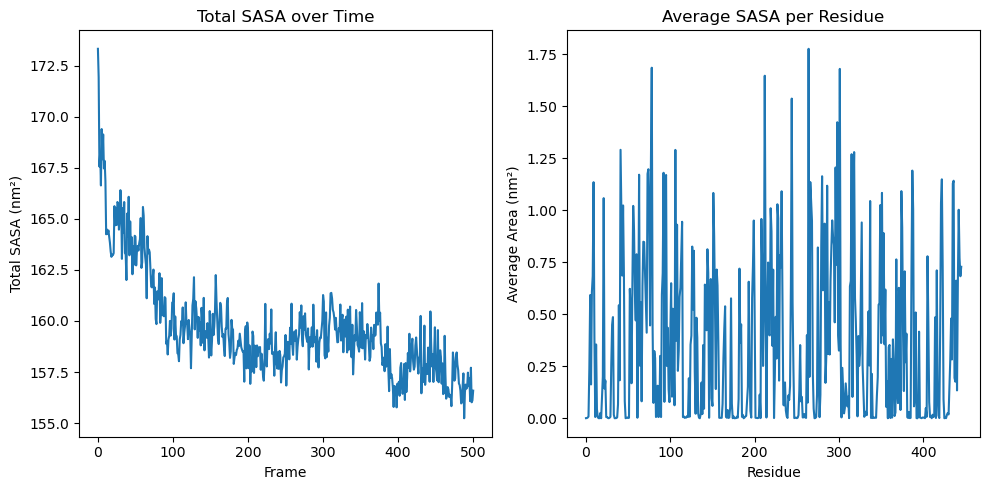

In [6]:
import mdtraj as md
import numpy as np
from IPython.display import display, Image
#print number of frames adn residues:
traj = md.load(traj_path, top=top_path)

print("Number of frames: ", traj.n_frames)
Image(filename=fig_path)


# Experiment Result: ✅❌

1. Completed without Exception or TimeOut Errors ✅
2. Attempted all necessary steps ✅
3. Completed without Hallucination ✅
4. Logic make sense ✅
5. Correct Answer ✅